# Zadanie 4: Funkcja Leaky ReLU

## Co to jest i dlaczego jej używamy? (Wyjaśnienie dla początkujących)

Wyobraź sobie standardową funkcję **ReLU** jako bardzo surowego bramkarza: jeśli liczba jest dodatnia, przepuszcza ją bez zmian. Jeśli jest ujemna, zamienia ją na absolutne zero.
Problem z tym podejściem polega na tym, że jeśli neuron otrzyma dużą ujemną wartość, jego wyjście staje się zerem, a jego pochodna (gradient) również staje się zerem. W procesie uczenia (wstecznej propagacji) oznacza to, że neuron przestaje się "uczyć" – staje się "martwy". Nazywamy to problemem **"Umierającego ReLU" (Dying ReLU)**.

**Leaky ReLU** (Nieszczelne ReLU) to taki "łagodniejszy" bramkarz. Dla liczb dodatnich działa tak samo (przepuszcza je). Natomiast dla liczb ujemnych nie zeruje ich całkowicie, ale mnoży przez bardzo małą liczbę (parametr $\alpha$, np. 0.01).

Dzięki temu:
1.  Informacja nie jest całkowicie tracona dla ujemnych wejść.
2.  Gradient nigdy nie jest zerem (jest albo 1, albo małą stałą $\alpha$), więc sieć może się uczyć nawet na ujemnych wartościach.

## Definicja matematyczna

Wzór funkcji:
$$ f(x) = \begin{cases} x & \text{dla } x \ge 0 \\ \alpha x & \text{dla } x < 0 \end{cases} $$

Gdzie $\alpha$ (alpha) to mała stała, zazwyczaj $0.01$.

## Gradient (Pochodna)

Pochodna funkcji Leaky ReLU jest bardzo prosta do obliczenia. Ponieważ funkcja składa się z dwóch linii prostych, jej pochodna to po prostu nachylenie tych linii:

$$ f'(x) = \begin{cases} 1 & \text{dla } x \ge 0 \\ \alpha & \text{dla } x < 0 \end{cases} $$

Dla $x \ge 0$ nachylenie wynosi 1 (kąt 45 stopni).
Dla $x < 0$ nachylenie wynosi $\alpha$ (lekki spadek).

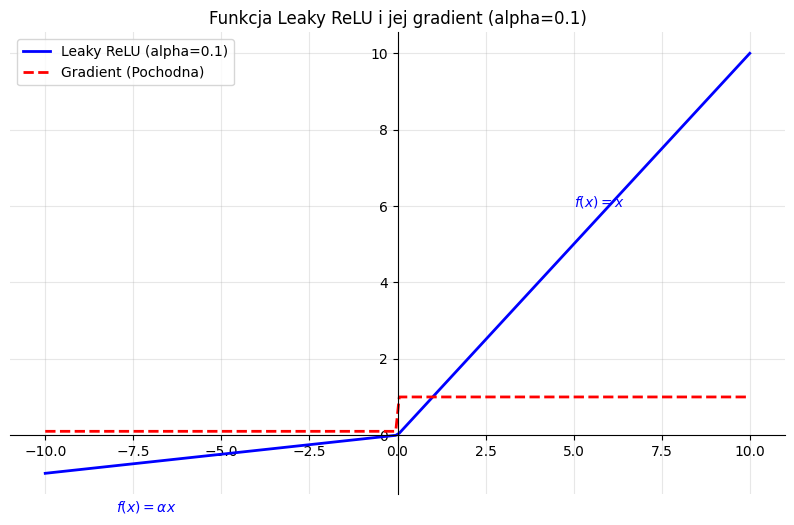

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.1):
    """
    Oblicza wartość funkcji Leaky ReLU.
    Dla czytelności wykresu użyjemy nieco większego alpha (np. 0.1), 
    aby "nieszczelność" była widoczna gołym okiem.
    """
    return np.where(x >= 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.1):
    """
    Oblicza pochodną (gradient) funkcji Leaky ReLU.
    """
    return np.where(x >= 0, 1, alpha)

# 1. Generowanie danych
x = np.linspace(-10, 10, 200)
alpha_param = 0.1  # Parametr nachylenia dla ujemnych wartości

# 2. Obliczenie funkcji i gradientu
y = leaky_relu(x, alpha_param)
dy = leaky_relu_derivative(x, alpha_param)

# 3. Rysowanie wykresu
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Ustawienie osi na środku (jak w przykładach z wykładu)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Wykres funkcji
plt.plot(x, y, 'b', linewidth=2, label=f'Leaky ReLU (alpha={alpha_param})')

# Wykres gradientu
plt.plot(x, dy, 'r--', linewidth=2, label='Gradient (Pochodna)')

plt.legend(loc='upper left')
plt.title(f"Funkcja Leaky ReLU i jej gradient (alpha={alpha_param})")
plt.grid(True, alpha=0.3)

# Dodanie etykiet dla jasności
plt.text(5, 6, r'$f(x)=x$', fontsize=10, color='blue')
plt.text(-8, -2, r'$f(x)=\alpha x$', fontsize=10, color='blue')

plt.show()

## Wnioski i zastosowanie

Na wykresie widzimy wyraźnie różnicę między funkcją (niebieska linia) a jej gradientem (czerwona przerywana linia).
*   **Prawa strona ($x>0$):** Funkcja rośnie liniowo, a gradient jest stały i równy 1.
*   **Lewa strona ($x<0$):** Funkcja lekko opada (nie jest płaska jak w zwykłym ReLU), a gradient jest stały i równy $\alpha$ (w tym przypadku 0.1).

### Gdzie stosuje się Leaky ReLU?

1.  **Głębokie Sieci Neuronowe:** Jest stosowana jako bezpośredni zamiennik zwykłego ReLU, gdy zauważymy, że sieć ma problemy z uczeniem się (problem znikającego gradientu lub martwych neuronów).
2.  **GAN (Generative Adversarial Networks):** Leaky ReLU jest bardzo popularna w dyskryminatorach sieci GAN. Pozwala to na lepszy przepływ gradientów z dyskryminatora do generatora, co stabilizuje proces uczenia, który w przypadku GAN-ów jest z natury niestabilny.
3.  **Computer Vision:** W zadaniach takich jak detekcja obiektów (np. w architekturze YOLO - You Only Look Once), Leaky ReLU jest często domyślną funkcją aktywacji.